In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

In [2]:
warnings.filterwarnings("ignore")

In [3]:
df = pd.read_csv('data/automobileEDA.csv')
df.head()

symboling  normalized-losses         make aspiration num-of-doors  \
0          3                122  alfa-romero        std          two   
1          3                122  alfa-romero        std          two   
2          1                122  alfa-romero        std          two   
3          2                164         audi        std         four   
4          2                164         audi        std         four   

    body-style drive-wheels engine-location  wheel-base    length  ...  \
0  convertible          rwd           front        88.6  0.811148  ...   
1  convertible          rwd           front        88.6  0.811148  ...   
2    hatchback          rwd           front        94.5  0.822681  ...   
3        sedan          fwd           front        99.8  0.848630  ...   
4        sedan          4wd           front        99.4  0.848630  ...   

   compression-ratio  horsepower  peak-rpm city-mpg highway-mpg    price  \
0                9.0       111.0    5000.0       21          27  13495.0   
1                9.0       111.0    5000.0       21          27  16500.0   
2                9.0       154.0    5000.0       19          26  16500.0   
3               10.0       102.0    5500.0       24          30  13950.0   
4                8.0       115.0    5500.0       18          22  17450.0   

  city-L/100km  horsepower-binned  diesel  gas  
0    11.190476             Medium       0    1  
1    11.190476             Medium       0    1  
2    12.368421             Medium       0    1  
3     9.791667             Medium       0    1  
4    13.055556             Medium       0    1  

[5 rows x 29 columns]

### dự đoán price dựa vào horsepower, curb-weight, engine-size, highway-mpg
#### sử dụng đa thức bậc 2

In [4]:
#import thư viện
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures

In [5]:
# chuẩn bị dữ liệu X, y
X = df[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']]
y = df['price']

In [6]:
# khởi tạo đa thức bậc 2
pf = PolynomialFeatures(degree=2)

In [7]:
X_pf = pf.fit_transform(X)

In [8]:
X_pf.shape

(201, 15)

In [24]:
# chia dữ liệu thành train và test theo tỉ lệ 80:20
# X_train, X_test, y_train, y_test = train_test_split(X_pf, y, test_size = 0.2)
df_train = pd.read_csv('data/autoMobile_train.csv')
df_test = pd.read_csv('data/autoMobile_test.csv')

In [25]:
X_train = df_train.drop('price', axis=1)
y_train = df_train['price']
X_test = df_test.drop('price', axis=1)
y_test = df_test['price']

In [26]:
X_train_pf = pf.fit_transform(X_train)
X_test_pf = pf.fit_transform(X_test)

In [27]:
# khởi tạo model
model = LinearRegression()

In [28]:
# huấn luyện model (train model)
model.fit(X_train_pf, y_train)

LinearRegression()

In [29]:
# kiểm tra model dựa trên bộ train
yhat_train = model.predict(X_train_pf)

In [30]:
y_train[:5]

0    12290.0
1     7898.0
2    16503.0
3     7975.0
4     5151.0
Name: price, dtype: float64

In [32]:
yhat_train[:5]

array([10160.40326009,  7824.62041343, 21027.24659351,  8549.44917648,
        6403.43637317])

In [33]:
# kiểm tra trên bộ test
yhat_test = model.predict(X_test_pf)

In [34]:
y_test[:5]

0     5195.0
1    12964.0
2    15510.0
3    17710.0
4     8495.0
Name: price, dtype: float64

In [35]:
yhat_test[:5]

array([ 6155.1257419 , 18508.75271524, 12923.76992388, 15115.02980134,
        8716.18624222])

In [18]:
# đo lường các chỉ số để đánh giá model: R-squared và MSE, MAE
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [37]:
# tính R-squared
print('R-squared train data:', round(model.score(X_train_pf, y_train) * 100, 2), '%')
print('R-squared test data:', round(model.score(X_test_pf, y_test) * 100, 2), '%')

R-squared train data: 86.43 %
R-squared test data: 73.5 %


In [38]:
# tính MSE và MAE
print('MSE train data:', mean_squared_error(y_train, yhat_train))
print('MSE test data:', mean_squared_error(y_test, yhat_test))

print('MAE train data:', mean_absolute_error(y_train, yhat_train))
print('MAE test data:', mean_absolute_error(y_test, yhat_test))

MSE train data: 8919273.744801672
MSE test data: 13669486.810365122
MAE train data: 2036.9374942101542
MAE test data: 2685.5585995829088


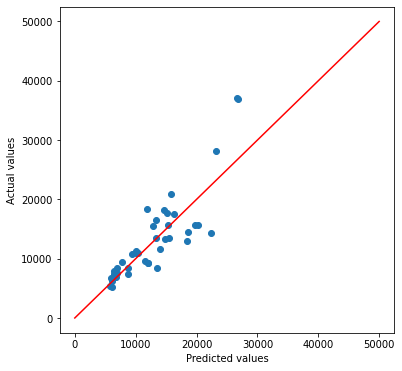

In [39]:
plt.figure(figsize = (6,6))
plt.scatter(yhat_test, y_test)
plt.xlabel('Predicted values')
plt.ylabel('Actual values')
plt.plot([0, 50000], [0, 50000], 'r-')
plt.show()

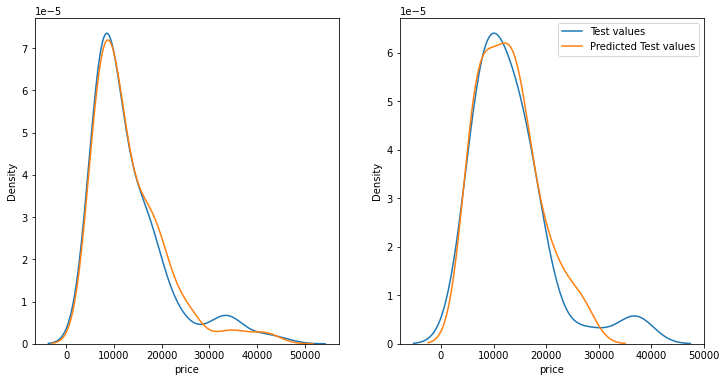

In [40]:
plt.figure(figsize=(12, 6))
plt.subplot(1,2,1)
sns.distplot(y_train, label = 'Train values', hist=False)
sns.distplot(yhat_train, label = 'Predicted Train values', hist=False)

plt.subplot(1,2,2)
sns.distplot(y_test, label = 'Test values', hist=False)
sns.distplot(yhat_test, label = 'Predicted Test values', hist=False)
plt.legend()
plt.show()